# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
data = pd.read_csv("INNHotelsGroup.csv")

<IPython.core.display.Javascript object>

In [3]:
df = data.copy()

<IPython.core.display.Javascript object>

In [4]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


<IPython.core.display.Javascript object>

In [5]:
df.shape

(36275, 19)

<IPython.core.display.Javascript object>

* The dataset has 36275 rows and 19 columns of data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

**Observations -**
* booking_status is the dependent variable - type object.
* Booking_ID, type_of_meal_plan, room_type_reserved, market_segment_type are all of type object
* All other dependent variables except for avg_price_per_room (float64) are int64 type.

In [7]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

**Observations -**
* The data has no duplicates or null values .

In [9]:
df.drop(["Booking_ID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [10]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


<IPython.core.display.Javascript object>

**Observations -**
* For simplicity we drop the Booking ID since each observation is unique.

In [11]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,NaN,NaN,NaN,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,NaN,NaN,NaN,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,NaN,NaN,NaN,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,NaN,NaN,NaN,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.00000,NaN,NaN,NaN,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.00000,NaN,NaN,NaN,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,NaN,NaN,NaN,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,NaN,NaN,NaN,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000


<IPython.core.display.Javascript object>

**Observations-**   

* Most of the bookings are are not cancelled.
* More bookings seem to have been done online.
* Most reserved room is room type 1.
* Most type of meal plan is meal plan 1.
* On average there are 2 adults that book the hotel with no children.
* Most bookings come on the weekends on average around 2 nights than on weekday.
* On average there seem to be 85 day between when the bookings are made and when guests arrive.
* On average the price per room is around 103 euros.
* On average there seem to be few repeated guests, few previous cancellations or not cancelled, few special requests.


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

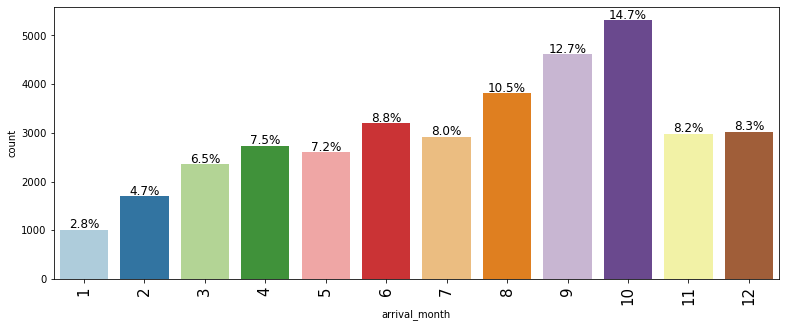

<IPython.core.display.Javascript object>

In [13]:
labeled_barplot(df, "arrival_month", perc=True)

**Observations -**
* It appears that the month with the higest bookings(busiest months) are the 10th (October) followed by September and then August.
* October has 14.7% of the total hotel bookings with september in 2nd with 12.7%

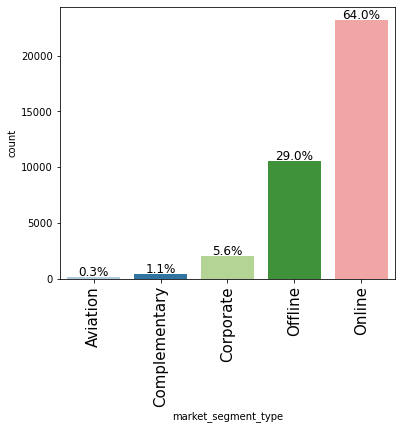

<IPython.core.display.Javascript object>

In [14]:
labeled_barplot(df, "market_segment_type", perc=True)

**Observations -**
* More than half of the bookings are done online at 64% whiles 29% are done offline followed by corporate

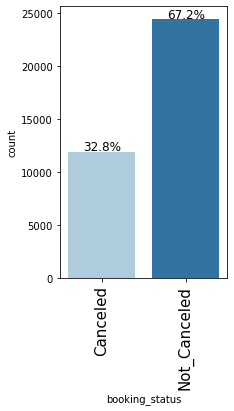

<IPython.core.display.Javascript object>

In [15]:
labeled_barplot(df, "booking_status", perc=True)

**Observations -**
* Close to a third of all bookings are cancelled which is significantly high for the hospitality business.

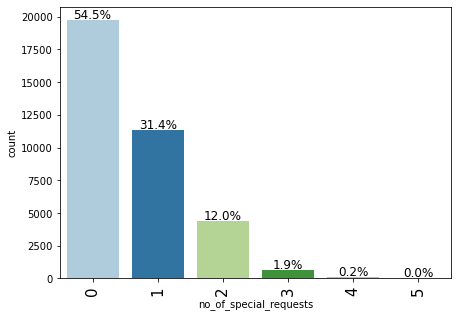

<IPython.core.display.Javascript object>

In [16]:
labeled_barplot(df, "no_of_special_requests", perc=True)

**Observations -**
* More than half of the booking has no special requests, followed by 1 at 31.4% of all the bookings.
* Over 12% of the bookings make special requests

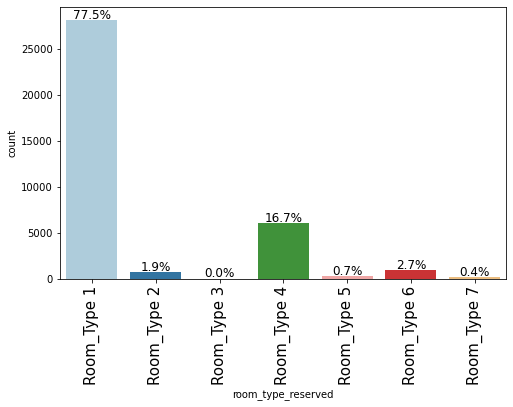

<IPython.core.display.Javascript object>

In [17]:
labeled_barplot(df, "room_type_reserved", perc=True)

**Observations -**
* Room type 1 is a popular choice among bookings in this hotel, with 77.5% of all bookings followed by room type 4 at 16.7%.

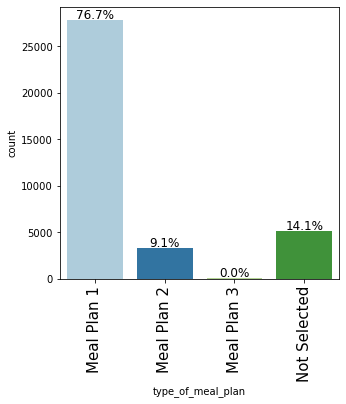

<IPython.core.display.Javascript object>

In [18]:
labeled_barplot(df, "type_of_meal_plan", perc=True)

**Observations -**
* Meal Plan 1 is a popular choice among bookings in this hotel, with 76.7% of all bookings whiles 14.1% didn't indicate the type of meal at the time of booking

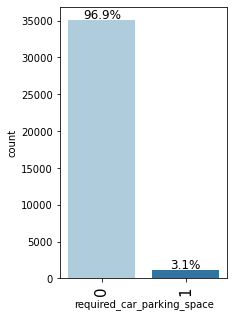

<IPython.core.display.Javascript object>

In [19]:
labeled_barplot(df, "required_car_parking_space", perc=True)

**Observations -**
* An overwhelming 96.9% of the bookings did not require car parking space.
* Seem like only a handful of people bring their cars to the hotel

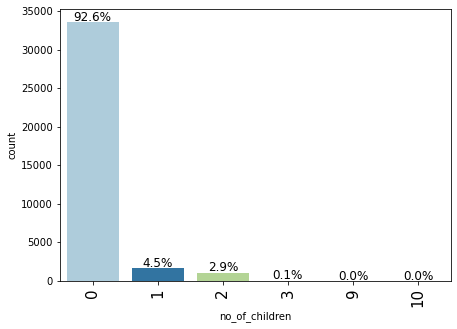

<IPython.core.display.Javascript object>

In [20]:
labeled_barplot(df, "no_of_children", perc=True)

**Observations -**
* Over 92.6% of the booking had no children accompanying them, with 4.5% have 1 child on the trip.
* Suprisingly 3 bookings had 9 to 10 children
* For simplicity seek we will replace the 10 and 9 kids with the next highest number which is 3.


In [21]:
df["no_of_children"] = df["no_of_children"].replace([9, 10], 3)

<IPython.core.display.Javascript object>

* For simplicity seek we will replace the 10 and 9 kids with the next highest number which is 3.

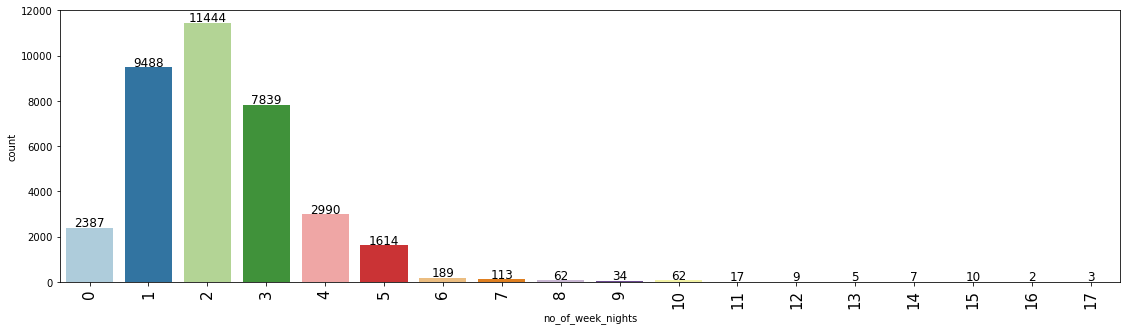

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(df, "no_of_week_nights")

**Observations -**
* OThe most popular nights to stay at this hotel was 2followed by 1 and then 3. 
* there were a few people that stayed for longer times

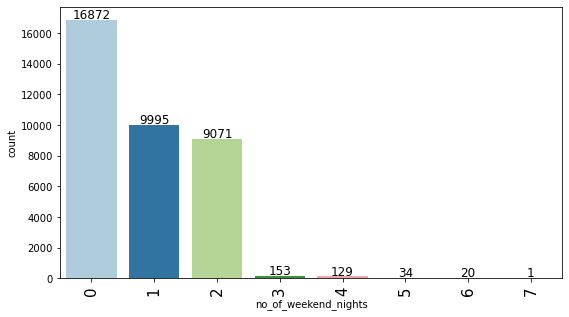

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(df, "no_of_weekend_nights")

**Observations -**
* Most people did not stay overnight at the night during the weekend, perhaps they came there for a conference or short stay. 
* There were about the same who stayed for 1 to 2 days( mostly 1) and there were others who stayed longer on the weekends

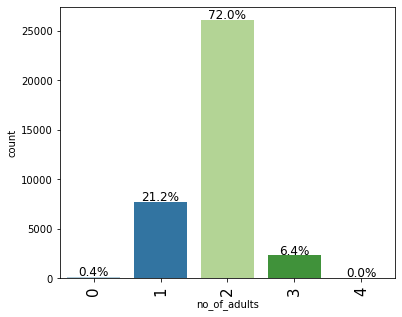

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(df, "no_of_adults", perc=True)

**Observations -**
* Over 72.% of the booking had 2 adults, with 21.2% as 1 person and others had more than 3.

In [25]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

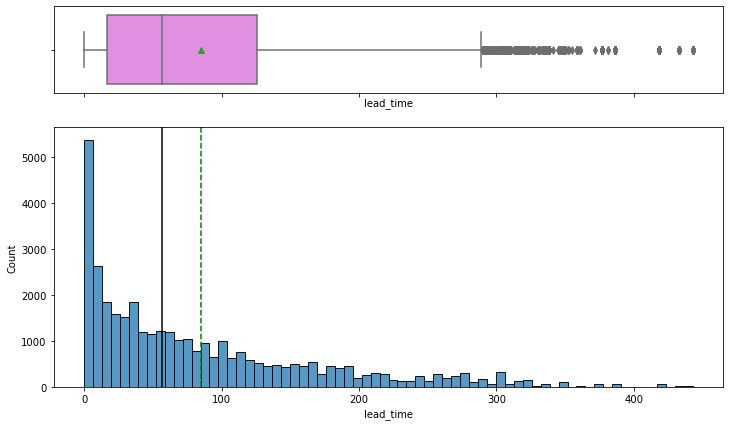

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(df, "lead_time")

**Observations -**
* There seem to be a right skewed distribution for the lead time. 
* Most people book well in in advance before arriving at the hotel.
* On average it take 85 days for guests to arrive after booking. 

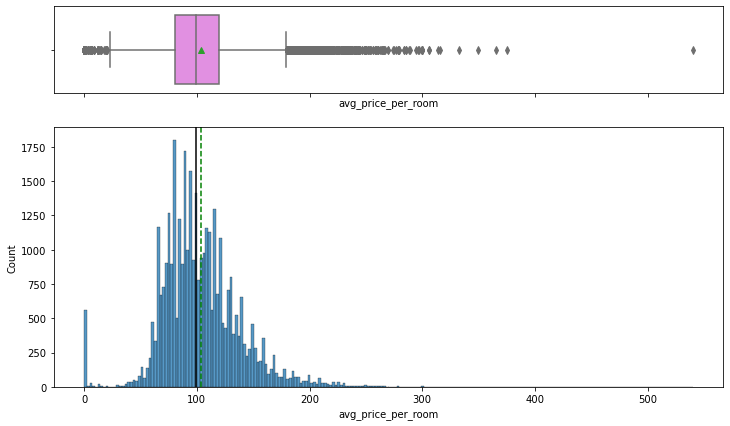

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(df, "avg_price_per_room")

**Observations -**
* There seem to be a right skewed distribution for the average price per room.
* On average it cost around 103 euros for a room at this hotel.
* Positively skewed shows that there are some rooms at the hotel that are expensive to stay in.

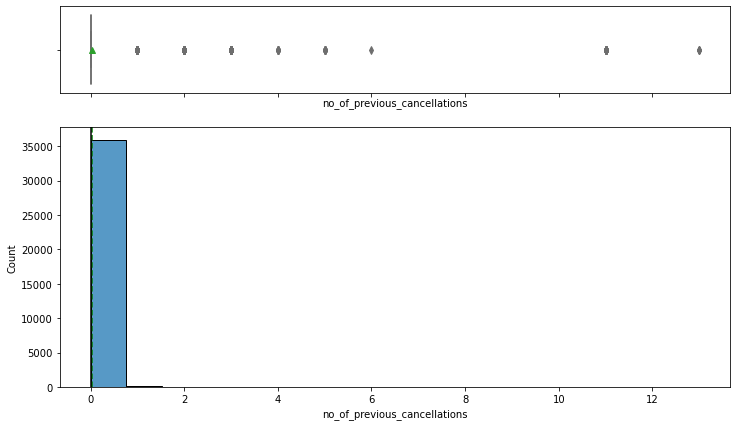

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(df, "no_of_previous_cancellations")

In [29]:
df["no_of_previous_cancellations"].value_counts()

0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

<IPython.core.display.Javascript object>

**Observations -**
* There seem to be a right skewed distribution for the number of previous cancellations.
* On average ithere were 0 cancellations.
* Positively skewed shows that there were some high number of cancellations max at 13.

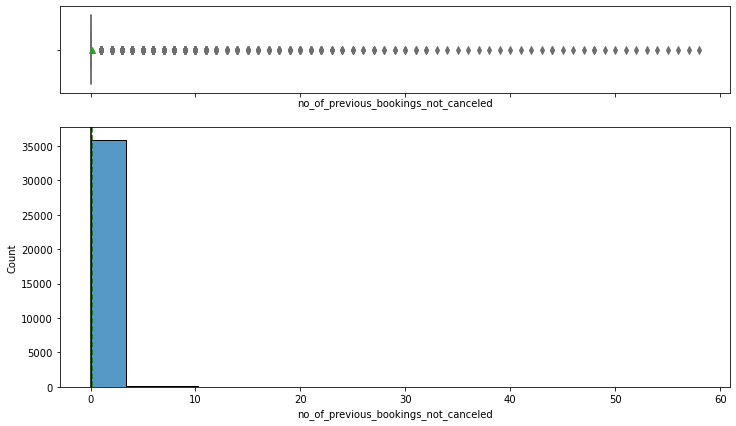

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(df, "no_of_previous_bookings_not_canceled")

**Observations -**
* There seem to be a right skewed distribution for the number of previous bookings not canceled.
* On average ithere were 0 non cancellations.
* Positively skewed shows that there were some high number of bookings not canceled.

In [31]:
def stacked_barplot(df, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

booking_status        Canceled  Not_Canceled    All
no_of_weekend_nights                               
All                      11885         24390  36275
0                         5093         11779  16872
1                         3432          6563   9995
2                         3157          5914   9071
4                           83            46    129
3                           74            79    153
5                           29             5     34
6                           16             4     20
7                            1             0      1
------------------------------------------------------------------------------------------------------------------------


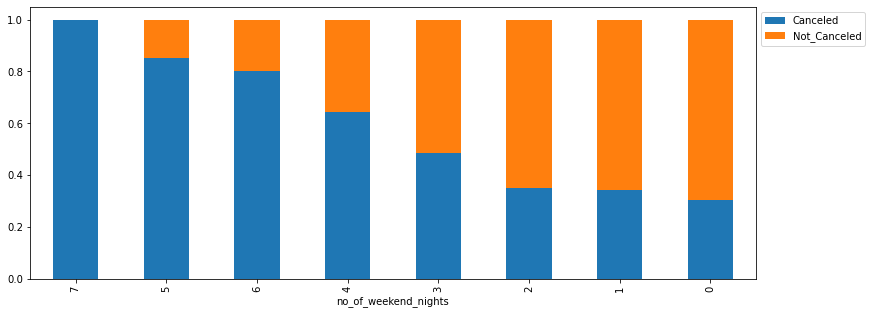

<IPython.core.display.Javascript object>

In [32]:
stacked_barplot(df, "no_of_weekend_nights", "booking_status")

**Observations -**
* Most bookings that were for less than a day stay on weekend night was cancelled followed by 1 day stay then 2.
* There seem to be an equal amount of cancellations and non cancellations for 3 weekend nights
* Amongst bookings that were cancelled, people who were to say 7 days were the highest

booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            11885         24390  36275
0                              11771         23380  35151
1                                114          1010   1124
------------------------------------------------------------------------------------------------------------------------


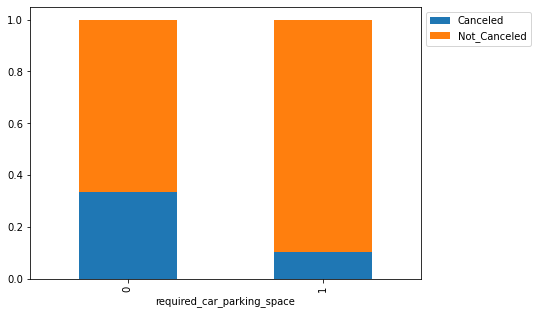

<IPython.core.display.Javascript object>

In [33]:
stacked_barplot(df, "required_car_parking_space", "booking_status")

**Observations -**
* Most bookings that required car parking space were not canceled.
* Also most bookings that did not required car parking space were not canceled.
* the proportion of Not canceled bookings were higher for bookings that required car parking space 

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


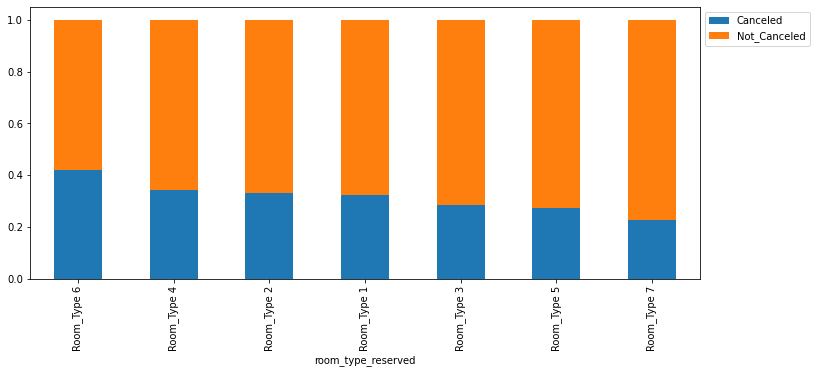

<IPython.core.display.Javascript object>

In [34]:
stacked_barplot(df, "room_type_reserved", "booking_status")

**Observations -**
* the proportion of Not canceled bookings were higher regardless of the room type
* Amongst bookings that were cancelled, people who chose room type 6 were the highest

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


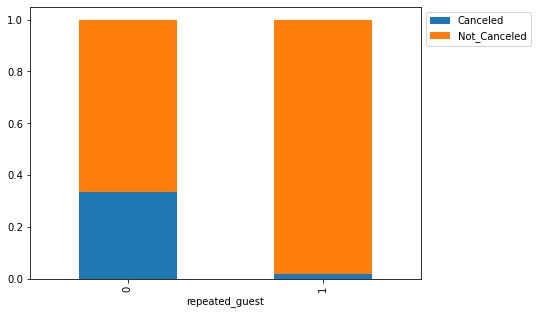

<IPython.core.display.Javascript object>

In [35]:
stacked_barplot(df, "repeated_guest", "booking_status")

**Observations -**
* Most bookings from repeated guests were not canceled.
* Also most bookings were not from repeated were not canceled.
* the proportion of Not canceled bookings were higher for bookings that came from repeated guests

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


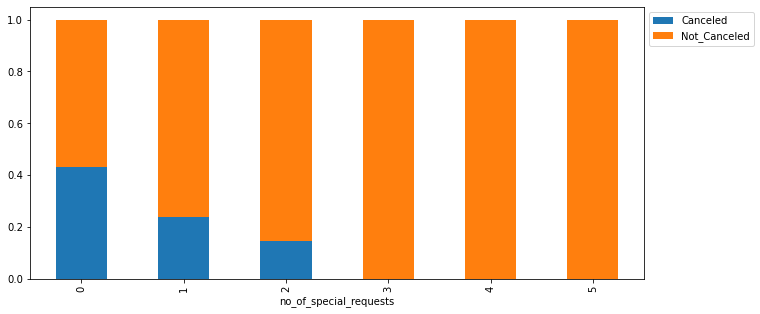

<IPython.core.display.Javascript object>

In [36]:
stacked_barplot(df, "no_of_special_requests", "booking_status")

**Observations -**
* the proportion of Not canceled bookings were higher regardless of the number of special requests
* Also people who had 3 or more requests did not cancel at all
* Amongst bookings that were cancelled, people who had 0 special requests were the highest

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


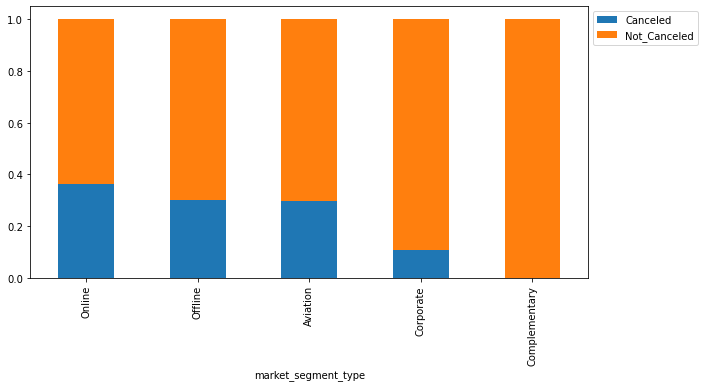

<IPython.core.display.Javascript object>

In [37]:
stacked_barplot(df, "market_segment_type", "booking_status")

**Observations -**
* the proportion of Not canceled bookings were higher regardless of the market segment type
* Also people who had complimentary did not cancel at all
* Amongst bookings that were cancelled, people who booked online were the highest

booking_status                Canceled  Not_Canceled    All
no_of_previous_cancellations                               
All                              11885         24390  36275
0                                11869         24068  35937
1                                   11           187    198
13                                   4             0      4
3                                    1            42     43
2                                    0            46     46
4                                    0            10     10
5                                    0            11     11
6                                    0             1      1
11                                   0            25     25
------------------------------------------------------------------------------------------------------------------------


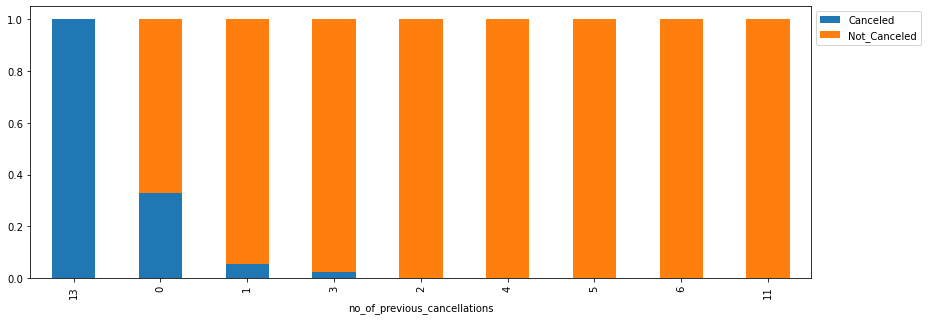

<IPython.core.display.Javascript object>

In [38]:
stacked_barplot(df, "no_of_previous_cancellations", "booking_status")

**Observations -**
* the proportion of Not canceled bookings were higher regardless of the number of previous cancellations
* Also people who had previous cancellations of 2,4,5,6,11 did not cancel at all
* Amongst bookings that were cancelled, people who has 13 previous cancellations were the highest

booking_status                        Canceled  Not_Canceled    All
no_of_previous_bookings_not_canceled                               
All                                      11885         24390  36275
0                                        11878         23585  35463
1                                            4           224    228
12                                           1            11     12
4                                            1            64     65
6                                            1            35     36
2                                            0           112    112
44                                           0             2      2
43                                           0             1      1
42                                           0             1      1
41                                           0             1      1
40                                           0             1      1
38                                           0  

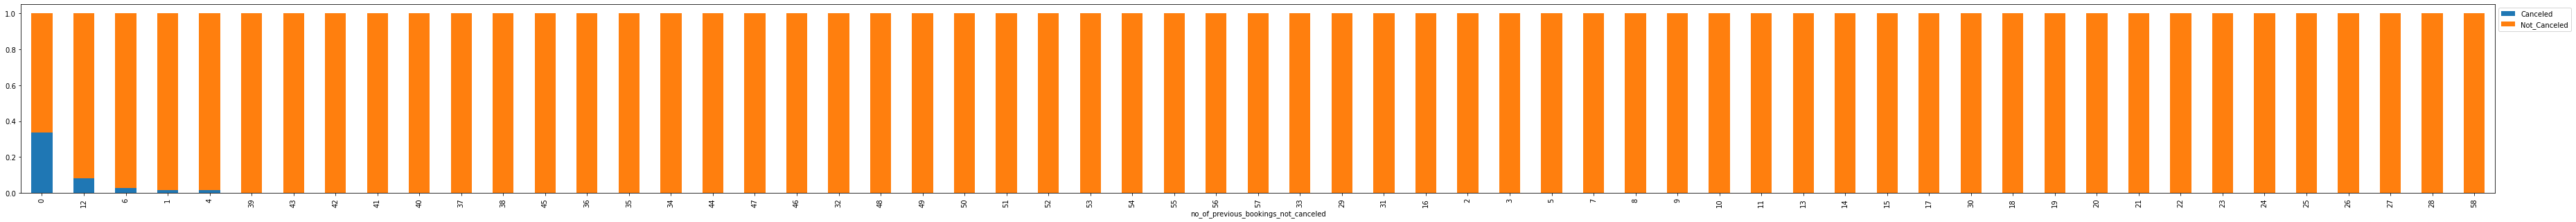

<IPython.core.display.Javascript object>

In [39]:
stacked_barplot(df, "no_of_previous_bookings_not_canceled", "booking_status")

**Observations -**
* the proportion of Not canceled bookings were higher regardless of the number of previous bookings not canceled
* Also some people who had previous bookings not canceled did not cancel at all
* Amongst bookings that were cancelled, people who has 0 previous bookings not canceled were the highest

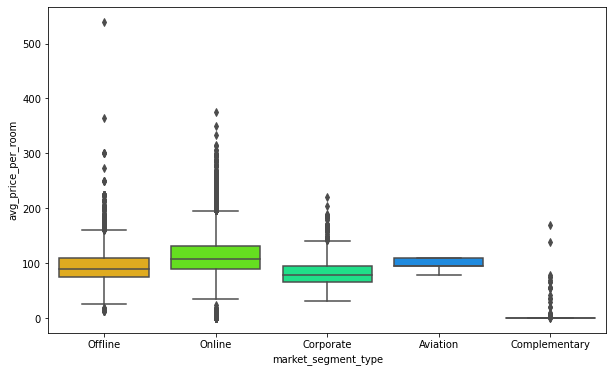

<IPython.core.display.Javascript object>

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

**Observations -**
* There seem to be a right skewed distribution for all the market segment types with respect to average price per room. 
* Online has the highest price per room on average 
* Offline had the maximum price per room

In [41]:
def corr_heatmap(num_corr):
    plt.figure(figsize=(14, 10))

    mask = np.triu(np.ones_like(num_corr.corr(), dtype=np.bool))
    sns.axes_style("white")
    heat_map = sns.heatmap(
        num_corr.corr(), mask=mask, annot=True, vmin=-1, vmax=1, cmap="coolwarm"
    )
    plt.title("Correlation  Heatmap")
    plt.show()

<IPython.core.display.Javascript object>

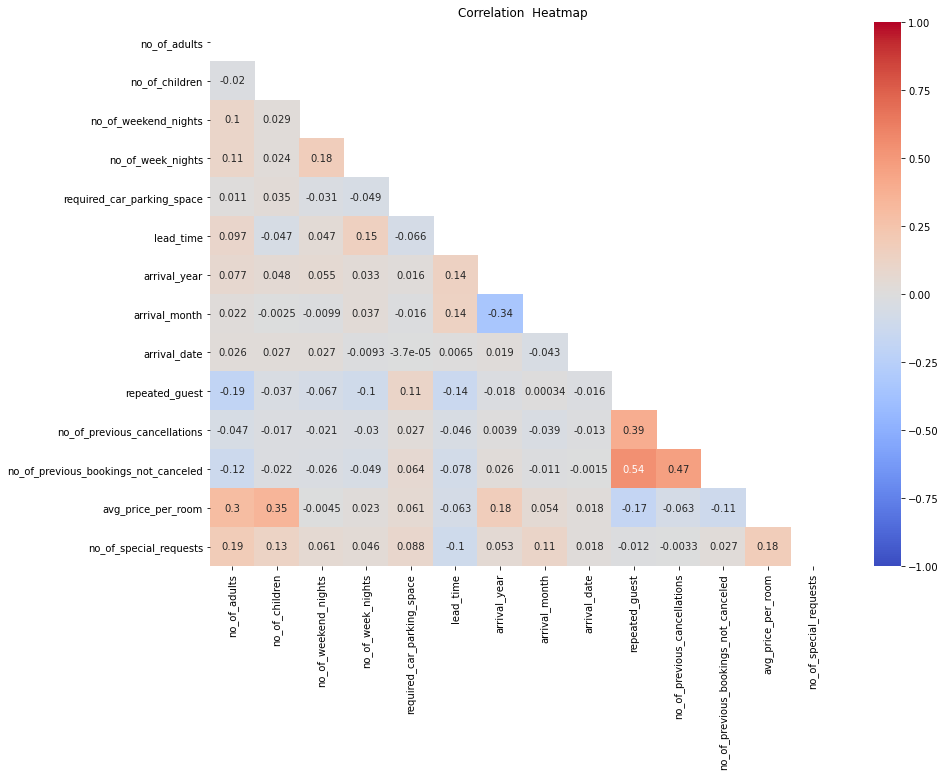

<IPython.core.display.Javascript object>

In [42]:
corr_heatmap(df)

**Observations -**
* There doesnt seem to be high correlations between any of the variables.
* there is 0.54 correlation between number of previous bookings not canceled and repeated guests. This makes sense because if they are repeated guests they are likely not to cancel

In [43]:
def distribution_plot_wrt_target(df, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

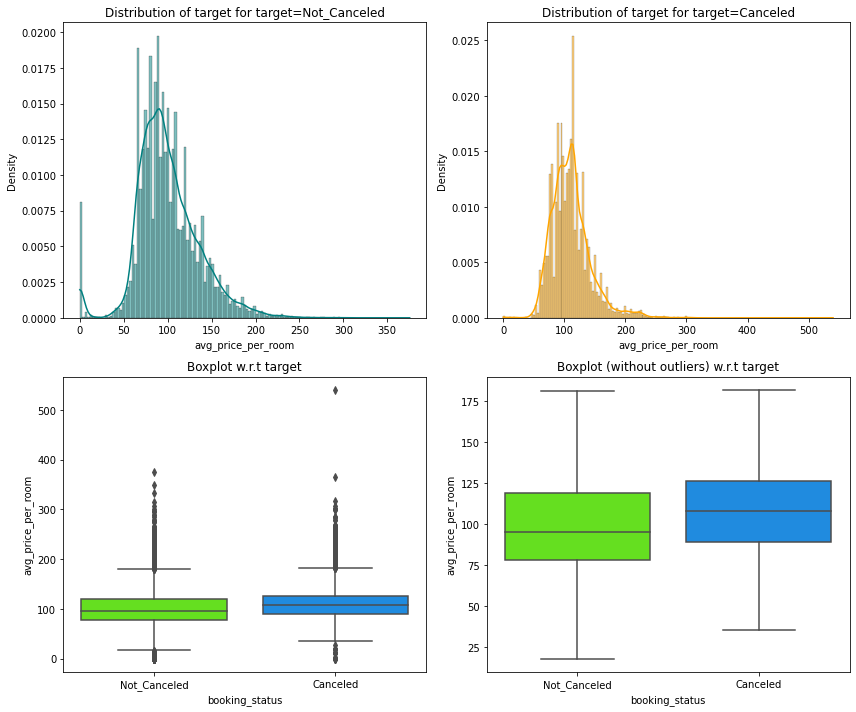

<IPython.core.display.Javascript object>

In [44]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

- We can see that the second and third quartiles of average price per room of canceled is much more than the second and third quartiles average price per room of not canceled.
- This shows that customers with high average price per room are more likely to cancel.

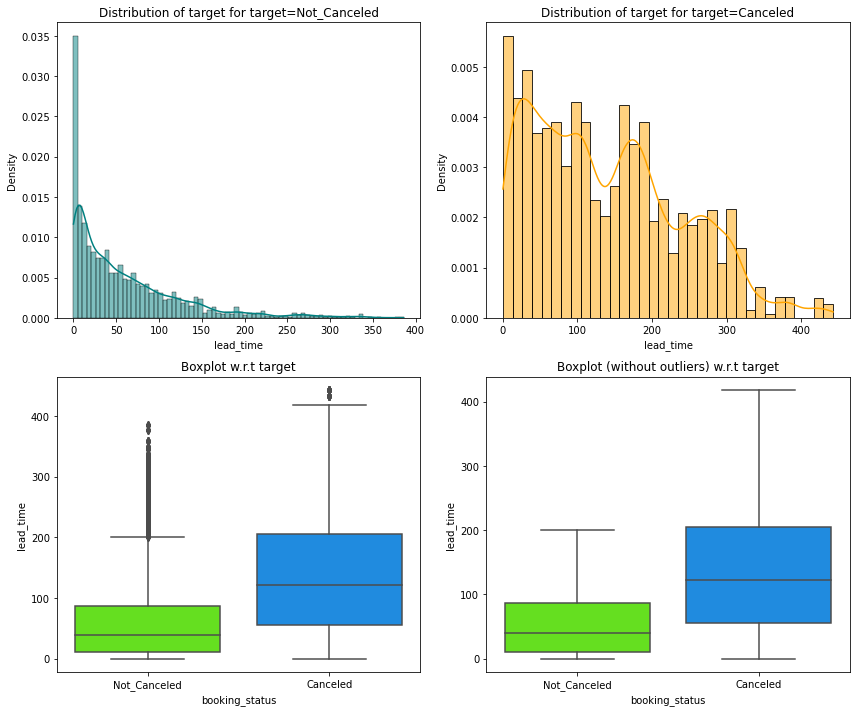

<IPython.core.display.Javascript object>

In [45]:
distribution_plot_wrt_target(df, "lead_time", "booking_status")

- We can see that the second and third quartiles of lead time of canceled is much more than the second and third quartiles lead time of not canceled.
- This shows that customers with high lead time are more likely to cancel.

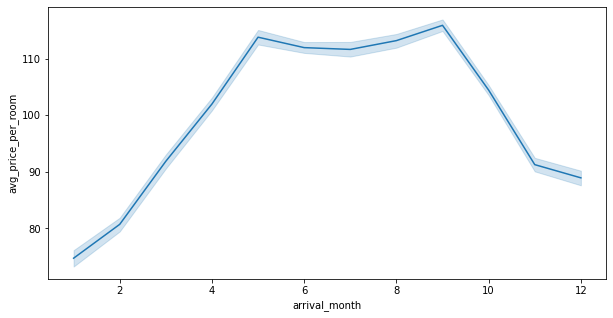

<IPython.core.display.Javascript object>

In [46]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=df, x="arrival_month", y="avg_price_per_room"
)  ## Complete the code to create lineplot between average price per room and arrival month
plt.show()

- Prices seem to be low at the start of the year, it steadily rises up to about May sustain and peeks at about September to October and sharply decline after that.


### Let us check which of these differences are statistically significant.

The Chi-Square test is a statistical method to determine if two categorical variables have a significant correlation between them.
  
**Null Hypothesis -** There is no association between the two variables.      
**Alternate Hypothesis -** There is an association between two variables.

In [47]:
import scipy.stats as stats

<IPython.core.display.Javascript object>

In [48]:
crosstab = pd.crosstab(
    df["room_type_reserved"], df["booking_status"]
)  # Contingency table of FICO and home_ownership attributes

Ho = "room_type_reserved has no effect on booking_status"  # Stating the Null Hypothesis
Ha = "room_type_reserved has an effect on booking_status"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

room_type_reserved has an effect on booking_status as the p_value (0.0) < 0.05


<IPython.core.display.Javascript object>

In [49]:
crosstab = pd.crosstab(
    df["repeated_guest"], df["booking_status"]
)  # Contingency table of FICO and home_ownership attributes

Ho = "repeated_guest has no effect on booking_status"  # Stating the Null Hypothesis
Ha = (
    "repeated_guest has an effect on booking_status"  # Stating the Alternate Hypothesis
)

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

repeated_guest has an effect on booking_status as the p_value (0.0) < 0.05


<IPython.core.display.Javascript object>

In [50]:
crosstab = pd.crosstab(
    df["market_segment_type"], df["booking_status"]
)  # Contingency table of FICO and home_ownership attributes

Ho = (
    "market_segment_type has no effect on booking_status"  # Stating the Null Hypothesis
)
Ha = "market_segment_type has an effect on booking_status"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

market_segment_type has an effect on booking_status as the p_value (0.0) < 0.05


<IPython.core.display.Javascript object>

In [51]:
crosstab = pd.crosstab(
    df["required_car_parking_space"], df["booking_status"]
)  # Contingency table of FICO and home_ownership attributes

Ho = "required_car_parking_space has no effect on booking_status"  # Stating the Null Hypothesis
Ha = "required_car_parking_space has an effect on booking_status"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

required_car_parking_space has an effect on booking_status as the p_value (0.0) < 0.05


<IPython.core.display.Javascript object>

In [52]:
crosstab = pd.crosstab(
    df["type_of_meal_plan"], df["booking_status"]
)  # Contingency table of FICO and home_ownership attributes

Ho = "type_of_meal_plan has no effect on booking_status"  # Stating the Null Hypothesis
Ha = "type_of_meal_plan has an effect on booking_status"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

type_of_meal_plan has an effect on booking_status as the p_value (0.0) < 0.05


<IPython.core.display.Javascript object>

## Data Preprocessing
- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [53]:
df["booking_status"] = df["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

<IPython.core.display.Javascript object>

In [54]:
# df["booking_status"] = np.where(df["booking_status"] == "Canceled", 1, 0)

<IPython.core.display.Javascript object>

In [55]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,1


<IPython.core.display.Javascript object>

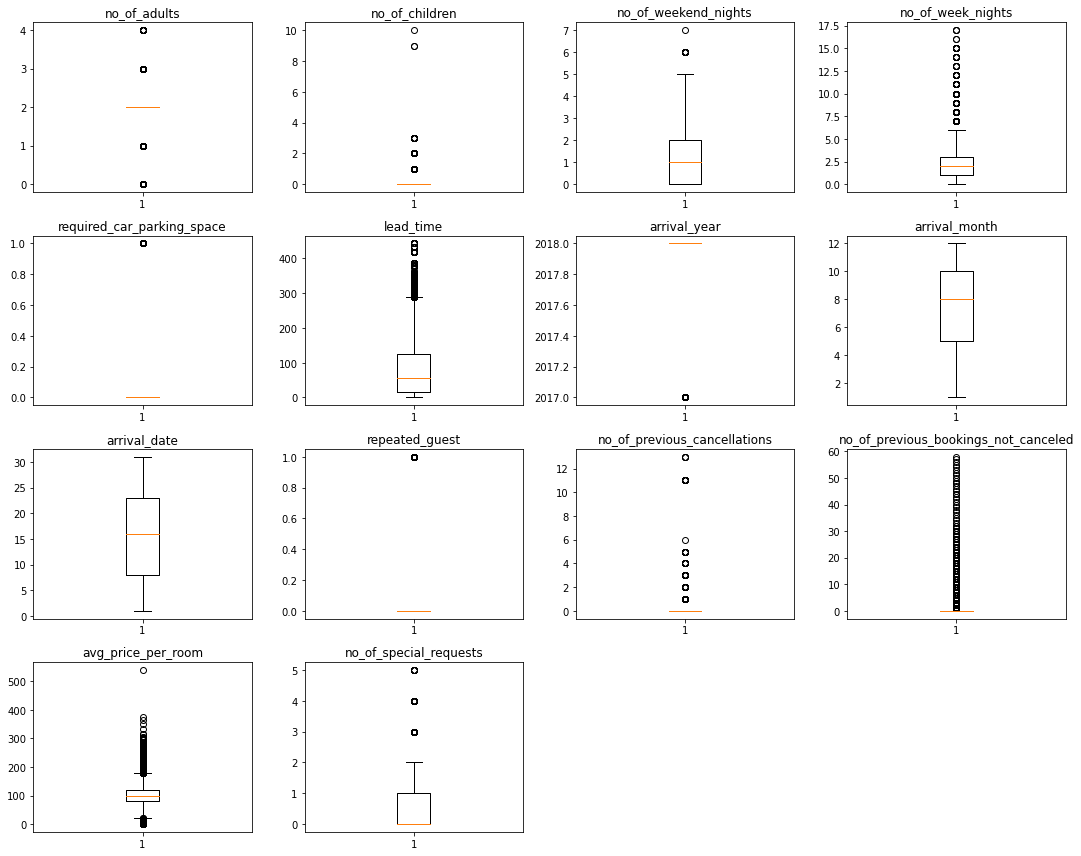

<IPython.core.display.Javascript object>

In [56]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations -**
* All but arrival date is skewed hence we should proceed with caution.

In [57]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [58]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Building a Logistic Regression model

In [59]:
X = df.drop("booking_status", axis=1)
Y = df["booking_status"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

X = sm.add_constant(X)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [60]:
print("Shape of Training set : ", X_train.shape[0])
print("Shape of test set : ", X_test.shape[0])
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  25392
Shape of test set :  10883
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [61]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                  39474810.78615
no_of_adults                                  1.35079
no_of_children                                2.09311
no_of_weekend_nights                          1.06947
no_of_week_nights                             1.09571
required_car_parking_space                    1.03992
lead_time                                     1.39491
arrival_year                                  1.43107
arrival_month                                 1.27563
arrival_date                                  1.00680
repeated_guest                                1.78348
no_of_previous_cancellations                  1.39569
no_of_previous_bookings_not_canceled          1.65199
avg_price_per_room                            2.05473
no_of_special_requests                        1.24796
type_of_meal_plan_Meal Plan 2                 1.27188
type_of_meal_plan_Meal Plan 3                 1.02526
type_of_meal_plan_Not Selected                1

<IPython.core.display.Javascript object>

**Observations -**
* All variables have no vif's except for market_segment_type_Corporate, market_segment_type_offline, market_segment_type_online. 
* Also market_segment_type_Complimentary has a vif close to 5, it will be a better idea to drop it.

In [62]:
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(
    disp=False
)  # setting disp=False will remove the information on number of iterations

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sun, 16 Jan 2022   Pseudo R-squ.:                  0.3293
Time:                        09:14:22   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -923.2807    120.833     -7.641      0.000   -1160.110    -686.452
no_of_adults                             0.1136      

<IPython.core.display.Javascript object>

**Observations**

- Negative values of the coefficient shows that probability of customer cancelling a booking

decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that that probability of customer cancelling a booking

decreases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values.

* There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

In [63]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80604,0.63422,0.73975,0.68293


<IPython.core.display.Javascript object>

**Observations**

- We see that Accuracy and Precision are higher than Recall

In [64]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


<IPython.core.display.Javascript object>

In [65]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

<IPython.core.display.Javascript object>

In [66]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit()
print(lg1.summary())

Optimization terminated successfully.
         Current function value: 0.425692
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sun, 16 Jan 2022   Pseudo R-squ.:                  0.3283
Time:                        09:14:23   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -916.0557    120.472     -7.604    

<IPython.core.display.Javascript object>

**Now no feature has p-value greater than 0.05, so we'll consider the features in *X_train1* as the final ones and *lg1* as final model.**

In [67]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80549,0.63279,0.73911,0.68183


<IPython.core.display.Javascript object>

**Observations**

- We see that Accuracy and Precision are still higher than Recall which didnt change much

In [68]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.11480,1.16576,1.11479,1.04262,0.20303,1.01583,1.57228,0.95850,0.06474,1.25723,1.01934,0.22997,1.17983,1.33096,0.70080,0.75421,0.47931,0.38040,0.23889,0.45323,0.16752
Change_odd%,-100.00000,11.47969,16.57635,11.47875,4.26206,-79.69675,1.58341,57.22767,-4.14986,-93.52598,25.72288,1.93423,-77.00299,17.98312,33.09559,-29.92003,-24.57872,-52.06881,-61.96015,-76.11050,-54.67705,-83.24783


<IPython.core.display.Javascript object>

### Coefficient interpretations

* `required_car_parking_space`: Holding all other features constant a unit change in required_car_parking_space will decrease the odds of a customer cancelling a booking by 0.20 times or a 79.69% decrease in odds.
* `lead_time`: Holding all other features constant a unit change in lead_time will increase the odds of a customer cancelling a booking by 1.02 times or a 1.58% increase in the odds.
* `no_of_children`:  Holding all other features constant a unit change in no_of_children will increase the odds of a customer cancelling a booking by 1.11 times or a 16.58% increase in the odds.
* `avg_price_per_room`:  Holding all other features constant a unit change in avg_price_per_room will increase the odds of a customer cancelling a booking by 1.02 times or a 1.93% increase in the odds.
* `no_of_previous_cancellations`:  Holding all other features constant a unit change in no_of_previous_cancellations will increase the odds of a customer cancelling a booking by 1.26 times or a 25.72% increase in the odds.
* `repeated_guest`: Holding all other features constant a unit change in repeated_guest will decrease the odds of a customer cancelling a booking by 0.06 times or a 93.52% decrease in odds.

`Interpretation for other attributes can be done similarly.`

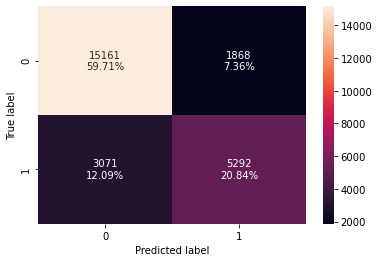

<IPython.core.display.Javascript object>

In [69]:
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [70]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train1, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80549,0.63279,0.73911,0.68183


<IPython.core.display.Javascript object>

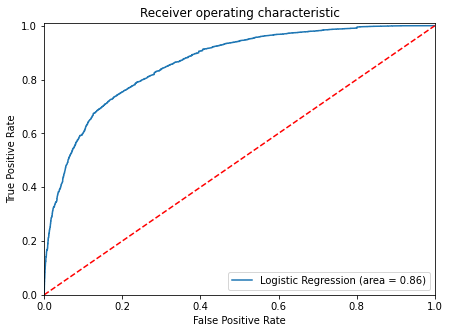

<IPython.core.display.Javascript object>

In [71]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is a low recall and ROC-AUC score.

In [72]:
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.37112356478219094


<IPython.core.display.Javascript object>

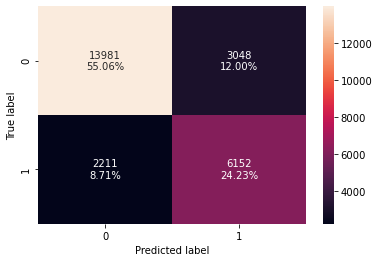

<IPython.core.display.Javascript object>

In [73]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)

In [74]:
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79289,0.73562,0.66870,0.70056


<IPython.core.display.Javascript object>

* Model performance has improved significantly.
* Model is giving a recall of 0.735 as compared to initial model which was giving a recall of 0.632. 
* Precision has decreased from 0.739 to 0.67.

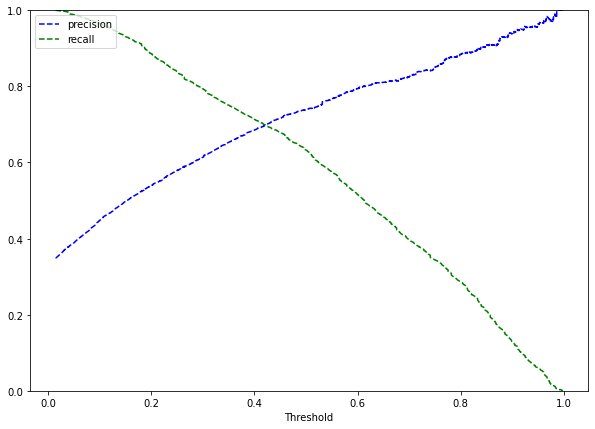

<IPython.core.display.Javascript object>

In [75]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [76]:
prec

array([0.3487635 , 0.34873634, 0.34875089, ..., 1.        , 1.        ,
       1.        ])

<IPython.core.display.Javascript object>

In [77]:
rec

array([1.00000000e+00, 9.99880426e-01, 9.99880426e-01, ...,
       9.56594523e-04, 1.19574315e-04, 0.00000000e+00])

<IPython.core.display.Javascript object>

* At threshold around 0.37 we will get equal precision and recall but taking a step back and selecting value around 0.41 will provide a higher recall and a good precision.

In [78]:
# setting the threshold
optimal_threshold_curve = 0.41

<IPython.core.display.Javascript object>

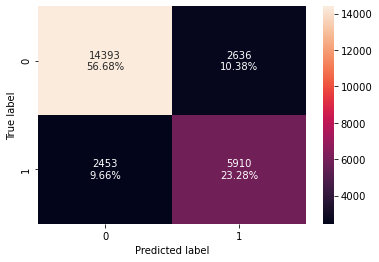

<IPython.core.display.Javascript object>

In [79]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [80]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79958,0.70668,0.69155,0.69904


<IPython.core.display.Javascript object>

* Recall has improved as compared to the initial model.
* Model is giving a better performance with 0.37 threshold found using AUC-ROC curve.

In [81]:
models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.41 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression statsmodel,Logistic Regression-0.37 Threshold,Logistic Regression-0.41 Threshold
Accuracy,0.80549,0.79289,0.79958
Recall,0.63279,0.73562,0.70668
Precision,0.73911,0.66870,0.69155
F1,0.68183,0.70056,0.69904


<IPython.core.display.Javascript object>

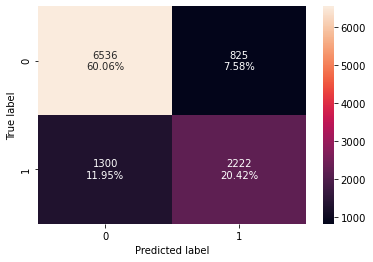

<IPython.core.display.Javascript object>

In [82]:
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [83]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test1, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80474,0.63089,0.72924,0.67651


<IPython.core.display.Javascript object>

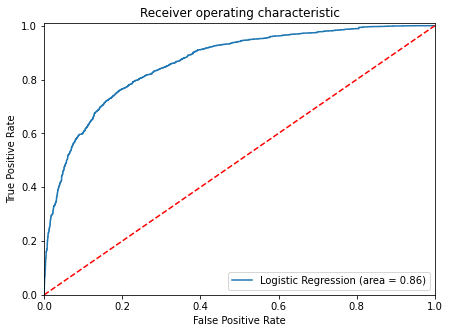

<IPython.core.display.Javascript object>

In [84]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [85]:
optimal_threshold_auc_roc = 0.37

<IPython.core.display.Javascript object>

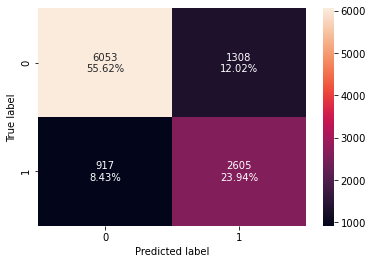

<IPython.core.display.Javascript object>

In [86]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [87]:
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79555,0.73964,0.66573,0.70074


<IPython.core.display.Javascript object>

In [88]:
optimal_threshold_auc_roc = 0.41

<IPython.core.display.Javascript object>

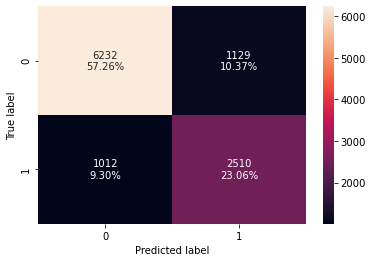

<IPython.core.display.Javascript object>

In [89]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [90]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80327,0.71266,0.68975,0.70102


<IPython.core.display.Javascript object>

## Model performance evaluation

In [91]:
models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.41 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression statsmodel,Logistic Regression-0.37 Threshold,Logistic Regression-0.41 Threshold
Accuracy,0.80549,0.79289,0.79958
Recall,0.63279,0.73562,0.70668
Precision,0.73911,0.66870,0.69155
F1,0.68183,0.70056,0.69904


<IPython.core.display.Javascript object>

In [92]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.41 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression statsmodel,Logistic Regression-0.37 Threshold,Logistic Regression-0.41 Threshold
Accuracy,0.80474,0.79555,0.80327
Recall,0.63089,0.73964,0.71266
Precision,0.72924,0.66573,0.68975
F1,0.67651,0.70074,0.70102


<IPython.core.display.Javascript object>

- All the models are giving a generalized performance on training and test set.
- The highest recall is 73.56% on the training set.
- Using the model with default threshold the model will give a low recall but good precision scores - This model will help the hotel save resources but lose on potential bookings.
- Using the model with 0.37 threshold the model will give a high recall but low precision scores - This model will help the hotel identify potential bookings( that will not cancel) effectively but the cost of resources will be high.
- Using the model with 0.41 threshold the model will give a balance recall and precision score - This model will help the hotel to maintain a balance in identifying potential bookings and the cost of resources.

## Building a Decision Tree model

In [93]:
X = df.drop("booking_status", axis=1)
Y = df["booking_status"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)


# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

<IPython.core.display.Javascript object>

In [94]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 29020
Number of rows in test data = 7255


<IPython.core.display.Javascript object>

In [95]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0   0.67136
1   0.32864
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67636
1   0.32364
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

In [96]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [97]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [98]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

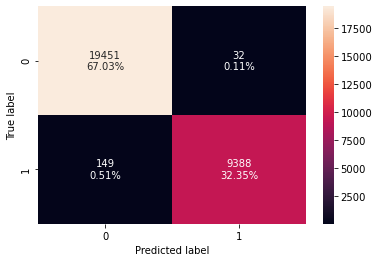

<IPython.core.display.Javascript object>

In [99]:
confusion_matrix_sklearn(model, X_train, y_train)

In [100]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99376,0.98438,0.99660,0.99045


<IPython.core.display.Javascript object>

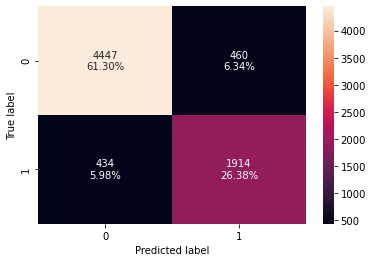

<IPython.core.display.Javascript object>

In [101]:
confusion_matrix_sklearn(model, X_test, y_test)

In [102]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.87677,0.81516,0.80623,0.81067


<IPython.core.display.Javascript object>

* Model is giving good and generalized results on training and test set.

## Do we need to prune the tree?

In [103]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


<IPython.core.display.Javascript object>

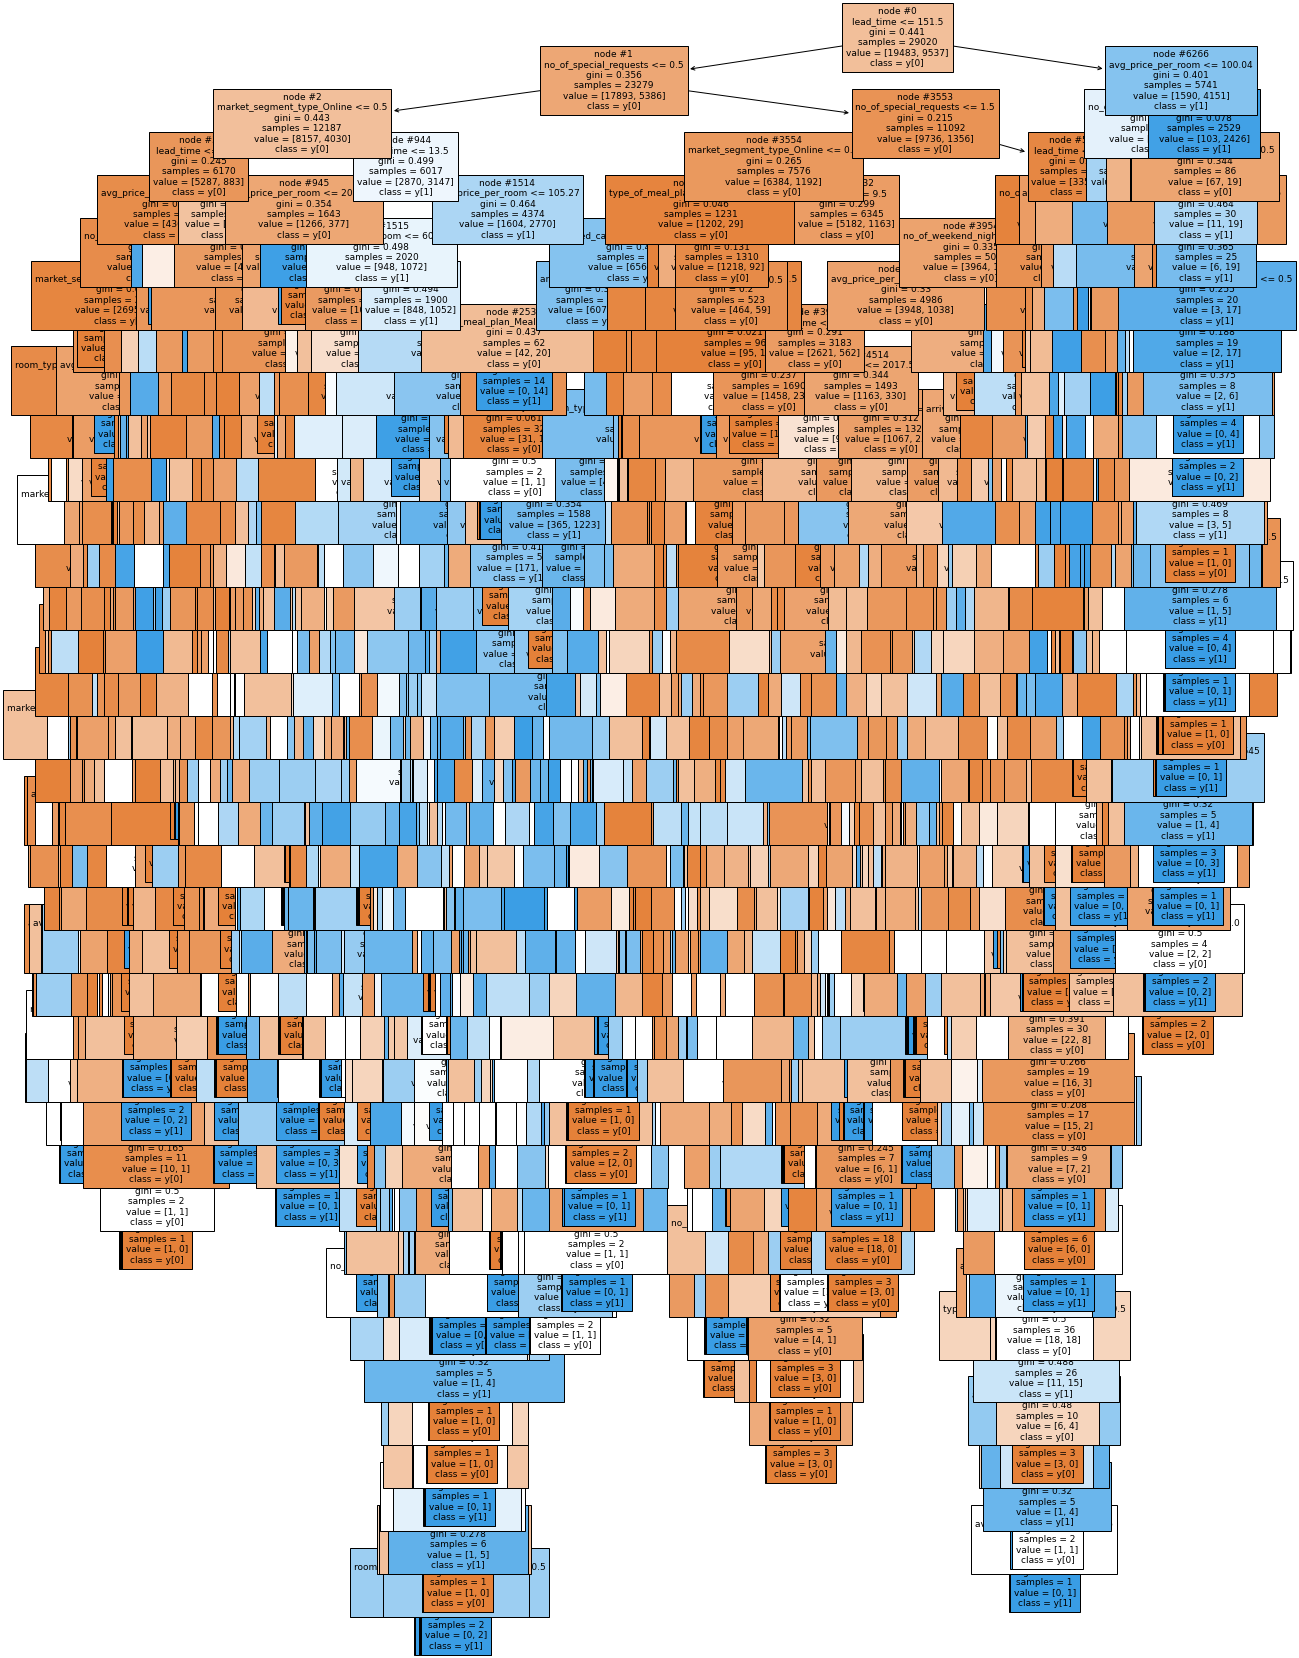

<IPython.core.display.Javascript object>

In [104]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [105]:
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 162.09
|   |   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 16
|   |   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [167.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  162.09
|   |   |   |   |   |   |   |   |   |   |--- arrival_month <= 10.50
|   |   |   |   |   |   |   |   |   |   |   |--- w

<IPython.core.display.Javascript object>

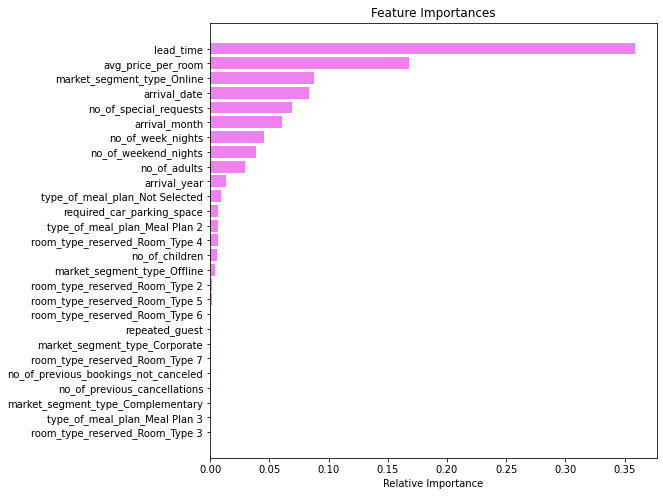

<IPython.core.display.Javascript object>

In [106]:
# feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* lead time, average price per room and market segment type online are the top 3 important features.

### Using GridSearch for Hyperparameter tuning of our tree model 
* Let's see if we can improve our model performance even more.

In [107]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=1e-06,
                       random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on training set

In [108]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.99376,0.98438,0.99660,0.99045


<IPython.core.display.Javascript object>

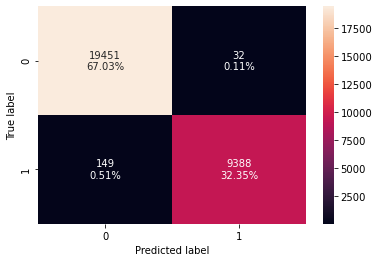

<IPython.core.display.Javascript object>

In [109]:
confusion_matrix_sklearn(estimator, X_train, y_train)

* The Recall has improved on the training set as compared to the initial model.

#### Checking performance on test set

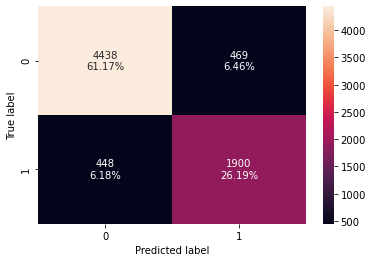

<IPython.core.display.Javascript object>

In [110]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [111]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.87360,0.80920,0.80203,0.80560


<IPython.core.display.Javascript object>

* After hyperparameter tuning the model test performance has remained same and the model has become simpler.

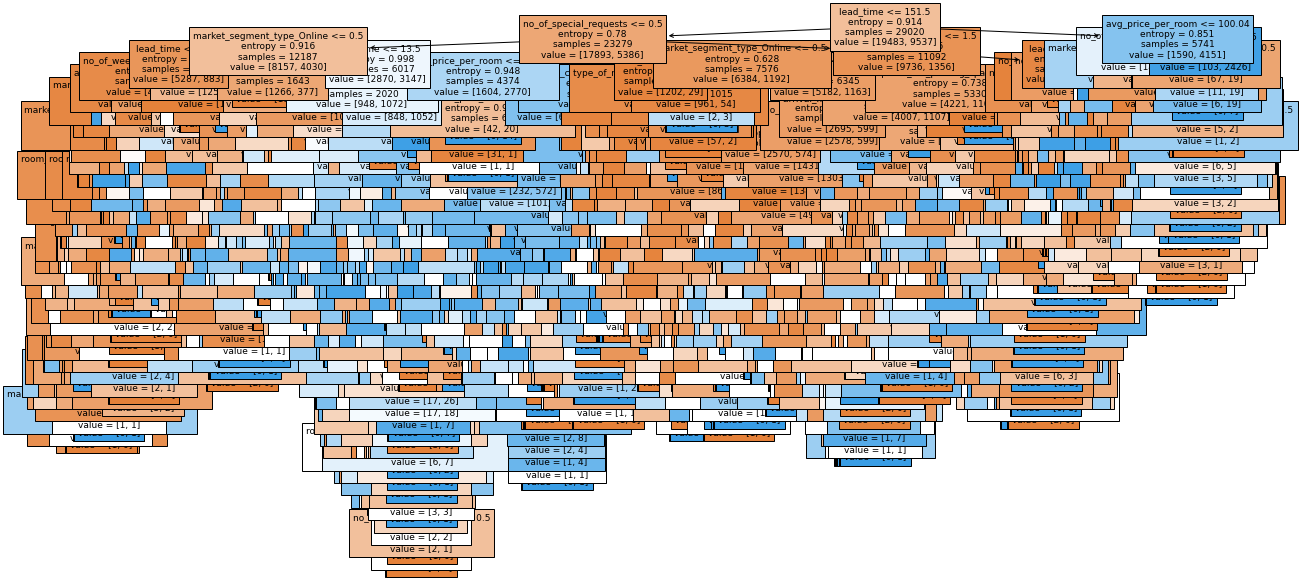

<IPython.core.display.Javascript object>

In [112]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

* We are getting a simplified tree after pre-pruning.

In [113]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 74.50
|   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |--- market_segment_type_Complementary <= 0.50
|   |   |   |   |   |   |   |   |   |--- arrival_month <= 11.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 23
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |   |   |   |   |   |--- arrival_month >  11.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [63.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- market_segment_ty

<IPython.core.display.Javascript object>

In [114]:
print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                         Imp
lead_time                            0.31719
avg_price_per_room                   0.17902
arrival_date                         0.08733
market_segment_type_Online           0.08553
arrival_month                        0.08379
no_of_special_requests               0.07562
no_of_week_nights                    0.04884
no_of_weekend_nights                 0.04050
no_of_adults                         0.02636
arrival_year                         0.01338
type_of_meal_plan_Not Selected       0.00708
room_type_reserved_Room_Type 4       0.00700
required_car_parking_space           0.00672
no_of_children                       0.00474
market_segment_type_Offline          0.00461
type_of_meal_plan_Meal Plan 2        0.00449
room_type_reserved_Room_Type 2       0.00242
repeated_guest                       0.00159
room_type_reserved_Room_Type 5       0.00097
market_segment_type_Complementary    0.00086
room_type_reserved_Room_Type 6       0.00076
market_seg

<IPython.core.display.Javascript object>

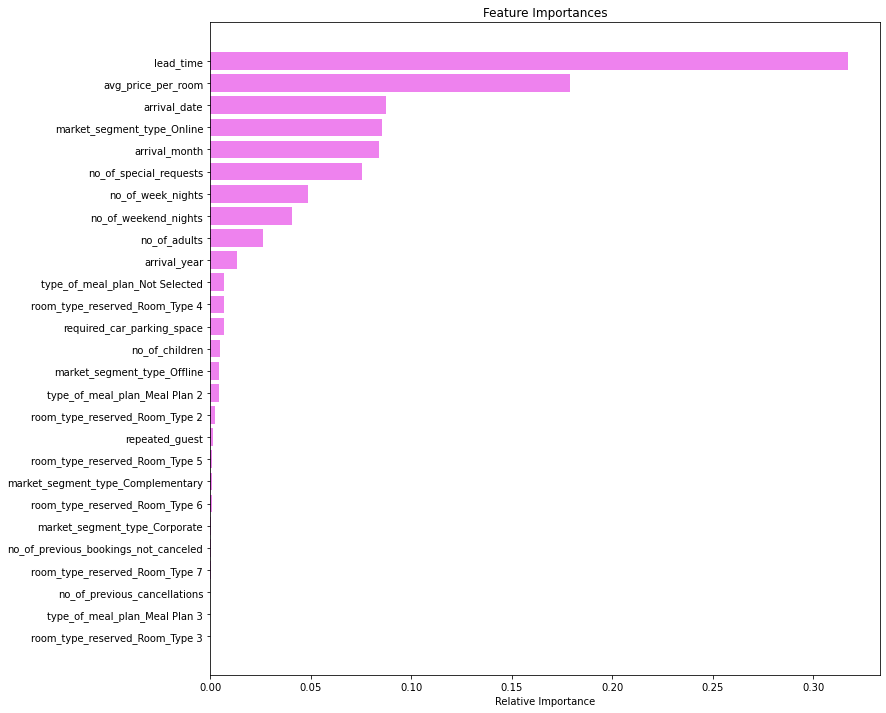

<IPython.core.display.Javascript object>

In [115]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* the third important feature changed to arrival date

## Cost Complexity Pruning

In [116]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [117]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00809
1,0.00000,0.00809
2,0.00000,0.00809
3,0.00000,0.00809
4,0.00000,0.00809
...,...,...
1527,0.00692,0.28605
1528,0.01342,0.29947
1529,0.01738,0.31685
1530,0.02384,0.36454


<IPython.core.display.Javascript object>

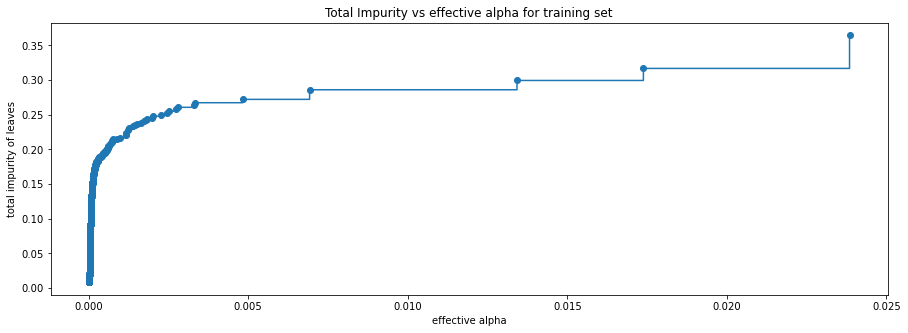

<IPython.core.display.Javascript object>

In [118]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [119]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07672689230188329


<IPython.core.display.Javascript object>

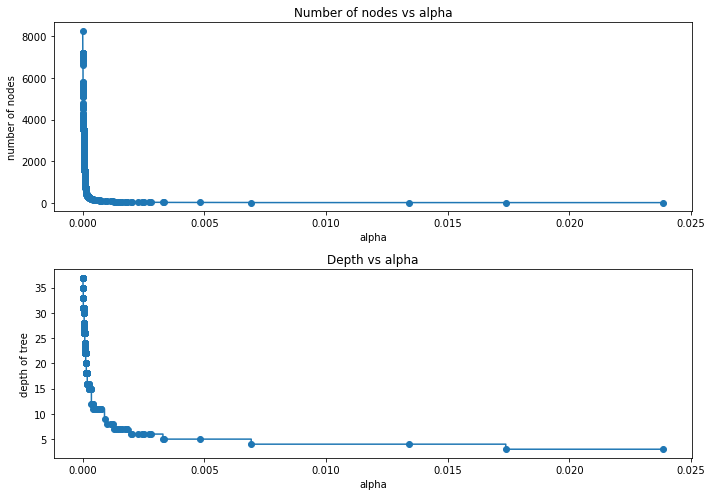

<IPython.core.display.Javascript object>

In [120]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Recall vs alpha for training and testing sets
----------------------------------------------------

In [121]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [122]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

In [123]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

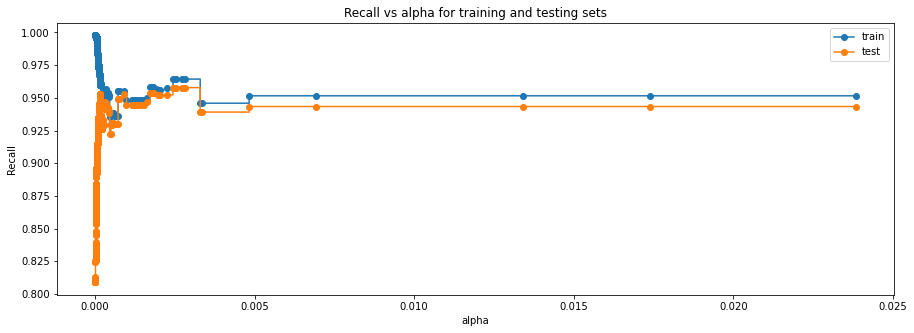

<IPython.core.display.Javascript object>

In [124]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

**Maximum value of Recall is at 0.02 alpha, but if we choose decision tree will only have a root node and we would lose the buisness rules, instead we can choose alpha 0.002 retaining information and getting higher recall.**

In [125]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0024444868854119274,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


<IPython.core.display.Javascript object>

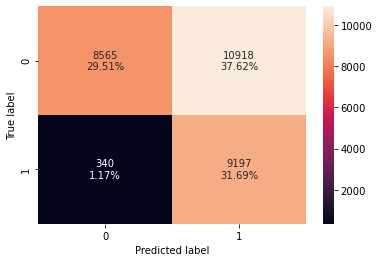

<IPython.core.display.Javascript object>

In [126]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [127]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.61206,0.96435,0.45722,0.62033


<IPython.core.display.Javascript object>

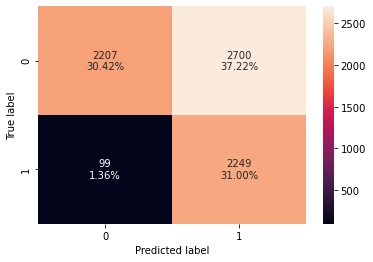

<IPython.core.display.Javascript object>

In [128]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [129]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.61420,0.95784,0.45444,0.61642


<IPython.core.display.Javascript object>

* With post-pruning we are getting good and generalized model performance on both training and test set.
* The recall has improved further.

### Visualizing the Decision Tree

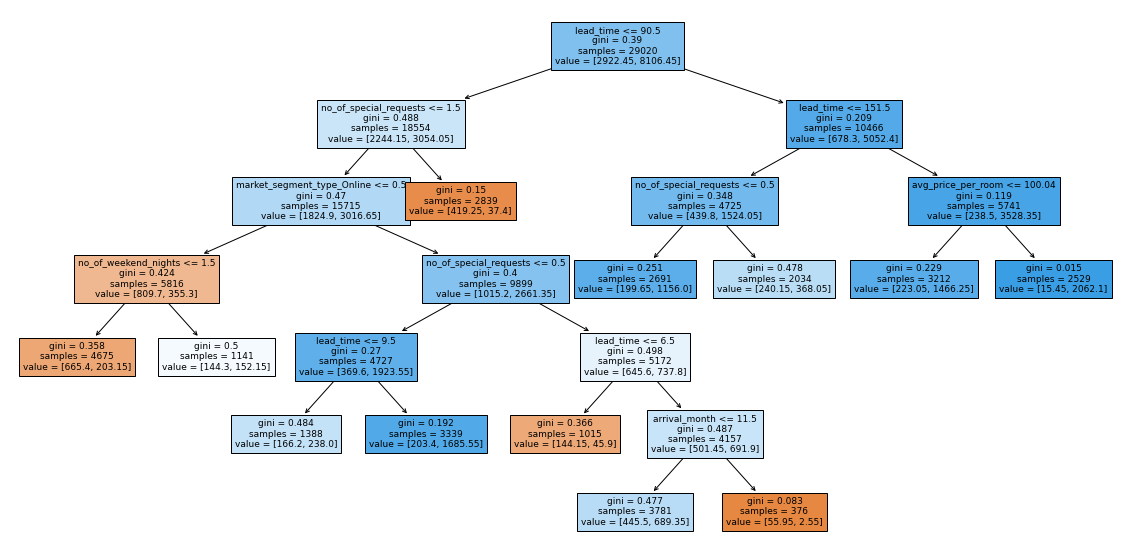

<IPython.core.display.Javascript object>

In [130]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [131]:
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 90.50
|   |--- no_of_special_requests <= 1.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |--- weights: [665.40, 203.15] class: 0
|   |   |   |--- no_of_weekend_nights >  1.50
|   |   |   |   |--- weights: [144.30, 152.15] class: 1
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- no_of_special_requests <= 0.50
|   |   |   |   |--- lead_time <= 9.50
|   |   |   |   |   |--- weights: [166.20, 238.00] class: 1
|   |   |   |   |--- lead_time >  9.50
|   |   |   |   |   |--- weights: [203.40, 1685.55] class: 1
|   |   |   |--- no_of_special_requests >  0.50
|   |   |   |   |--- lead_time <= 6.50
|   |   |   |   |   |--- weights: [144.15, 45.90] class: 0
|   |   |   |   |--- lead_time >  6.50
|   |   |   |   |   |--- arrival_month <= 11.50
|   |   |   |   |   |   |--- weights: [445.50, 689.35] class: 1
|   |   |   |   |   |--- arrival_month >  11.50
|   |   |   |   |   |   |--- weights: [55.95

<IPython.core.display.Javascript object>

In [132]:
print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                         Imp
lead_time                            0.43919
no_of_special_requests               0.29584
market_segment_type_Online           0.20101
arrival_month                        0.02290
no_of_weekend_nights                 0.02233
avg_price_per_room                   0.01873
no_of_week_nights                    0.00000
room_type_reserved_Room_Type 2       0.00000
market_segment_type_Offline          0.00000
market_segment_type_Corporate        0.00000
market_segment_type_Complementary    0.00000
room_type_reserved_Room_Type 7       0.00000
room_type_reserved_Room_Type 6       0.00000
room_type_reserved_Room_Type 5       0.00000
room_type_reserved_Room_Type 4       0.00000
room_type_reserved_Room_Type 3       0.00000
type_of_meal_plan_Meal Plan 3        0.00000
type_of_meal_plan_Not Selected       0.00000
required_car_parking_space           0.00000
type_of_meal_plan_Meal Plan 2        0.00000
no_of_children                       0.00000
no_of_prev

<IPython.core.display.Javascript object>

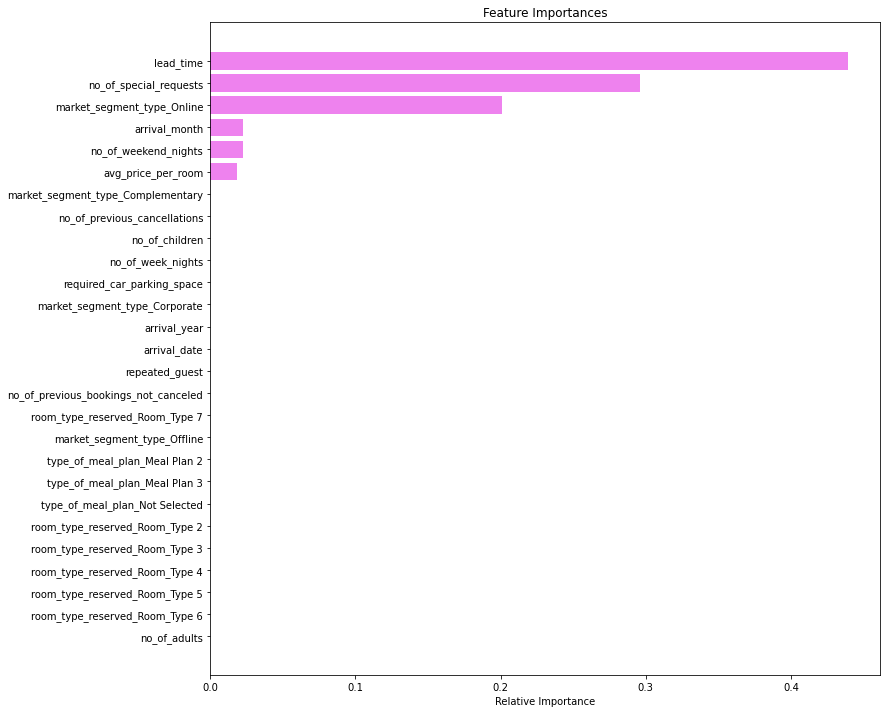

<IPython.core.display.Javascript object>

In [133]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* lead time, number of special requests, and market segment type online are now the most important feature with post-pruning.

## Model Performance Comparison and Conclusions

In [134]:
models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99376,0.99376,0.61206
Recall,0.98438,0.98438,0.96435
Precision,0.99660,0.99660,0.45722
F1,0.99045,0.99045,0.62033


<IPython.core.display.Javascript object>

In [135]:
models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87677,0.87360,0.61420
Recall,0.81516,0.80920,0.95784
Precision,0.80623,0.80203,0.45444
F1,0.81067,0.80560,0.61642


<IPython.core.display.Javascript object>

* Decision tree with post-pruning is giving the highest recall on the test set.
* The tree with post pruning is not complex and easy to interpret.

## Conclusion
- We analyzed the "The impact of booking cancellations on Hotel INN" using different techniques and used Decision Tree Classifier to build a predictive model for the same.
- The model built can be used to predict if a booking is going to be cancelled or not.
- We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.
- We verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.
- Lead time, number of special requests and market segment type online  are the most important variable in predicting whether a booking will be cancelled
- We established the importance of hyper-parameters/ pruning to reduce overfitting.

## Recommendations
- Since lead time is an important feature, it is important that the company charges a fee is the lead time is close and a booking is cancelled. This is because it may be nearly impossible to resell the room.
- Market segment type also has an effect on whether a person would cancel. We saw that complimentary bookings were not cancelled. Perhaps to draw in more customers the hotel should do that more often.
- Most bookings that required car parking space were not canceled. Hence the hotel should advertise that they have more parking spaces and that parking is complimentary to draw potential bookings.
- Customer retention - Member Loyalty programs initiatives like special discounts, coupons, etc can be provided to get more repeat guest since they are less likely to cancel their bookings.
- We also saw that bookings with high number of special request did not cancel and hence the hotel should advertise their accommodations to get more people who need special assistance to book.
- Website should be made more friendly, easily accessible, and feasible because more cancellations come from online. Since online is an important feature the hotel needs to make it easy and appealing.